In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
np.random.seed(0)
%matplotlib inline

In [2]:
def generate_data(N,r,noise=0.1):
    angle = np.random.rand(N)*2*np.pi
    x = np.zeros((N,2))
    x[:,0] = r*np.cos(angle)
    x[:,1] = r*np.sin(angle)
    x = x+np.random.randn(N,2)*noise
    return x

def generate_set(N,r1,r2,noise=0.1):
    x = np.zeros((N,2))
    y = np.zeros((N))
    
    y[:N/2] = 0.0
    y[N/2:] = 1.0
    
    x[:N/2] = generate_data(N/2,r1,noise)
    x[N/2:] = generate_data(N/2,r2,noise)
    return x,y

In [3]:
N_train = 20
N_test = 200
r1 = 0.75
r2 = 1.0
noise = 0.1
X_train,Y_train = generate_set(N_train,r1,r2,noise)
X_test,Y_test = generate_set(N_test,r1,r2,noise)

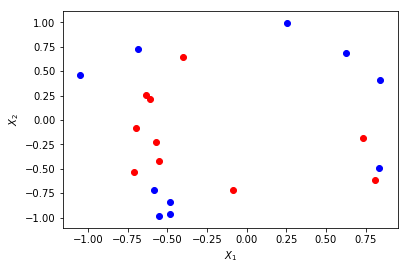

In [4]:
plt.figure()
plt.scatter(X_train[:N_train/2,0],X_train[:N_train/2,1],color='r',label='class 1')
plt.scatter(X_train[N_train/2:,0],X_train[N_train/2:,1],color='b',label='class 2')
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.show()

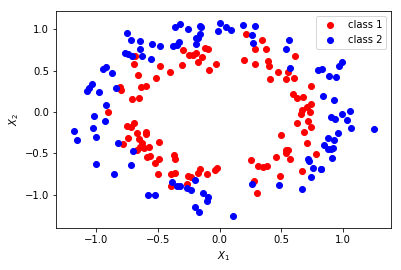

In [5]:
plt.figure()
plt.scatter(X_test[:N_test/2,0],X_test[:N_test/2,1],color='r',label='class 1')
plt.scatter(X_test[N_test/2:,0],X_test[N_test/2:,1],color='b',label='class 2')
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.legend()
plt.show()

In [6]:
def create_poly_features(x):
    f1 = x[:,0]**2+x[:,1]**2
    f2 = x[:,0]*x[:,1]
    f3 = x[:,0]**2
    f4 = x[:,1]**2
    f5 = x[:,0]*f4
    f6 = x[:,1]*f3
    x = np.vstack([x[:,0], x[:,1], f1,f2,f3,f4,f5,f6])
    return x.T

In [7]:
X_poly_train = create_poly_features(X_train)
X_poly_test = create_poly_features(X_test)
print X_poly_train.shape

(20, 8)


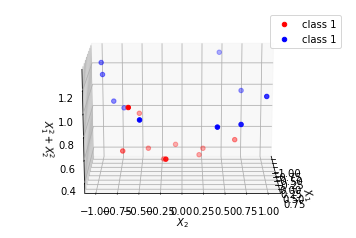

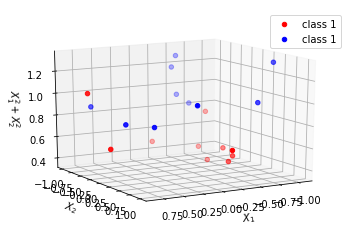

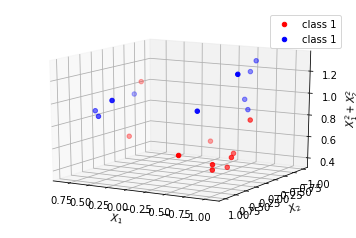

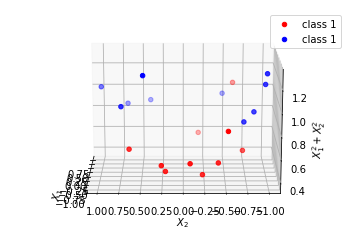

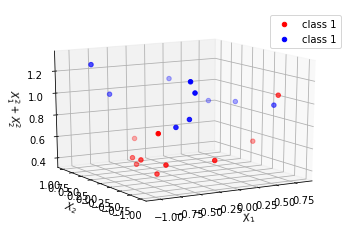

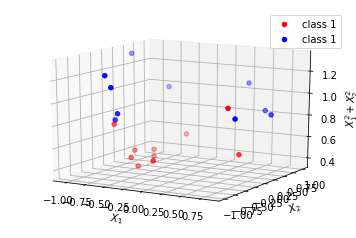

In [8]:
for angle in range(0, 360,60):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_poly_train[:N_train/2,0],X_poly_train[:N_train/2,1],X_poly_train[:N_train/2,2],color='r',label='class 1')
    ax.scatter(X_poly_train[N_train/2:,0],X_poly_train[N_train/2:,1],X_poly_train[N_train/2:,2],color='b',label='class 1')
    ax.set_xlabel(r'$X_1$')
    ax.set_ylabel(r'$X_2$')
    ax.set_zlabel(r'$X_1^2+X_2^2$')
    plt.legend()
    ax.view_init(15, angle)
    plt.show()

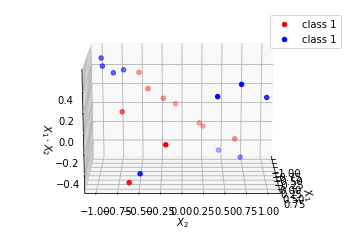

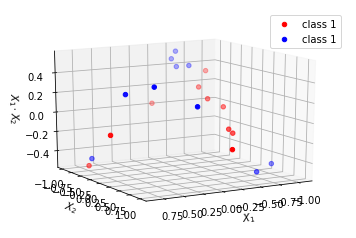

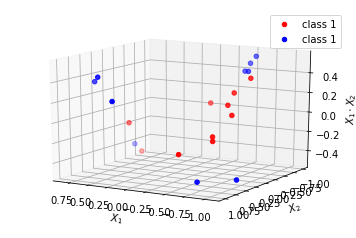

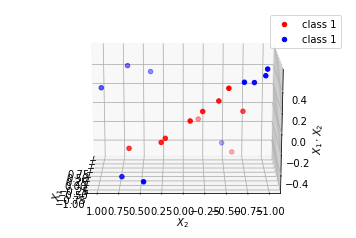

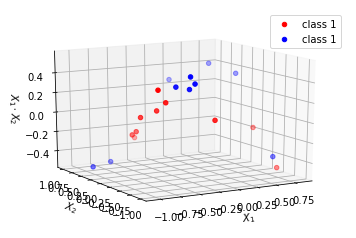

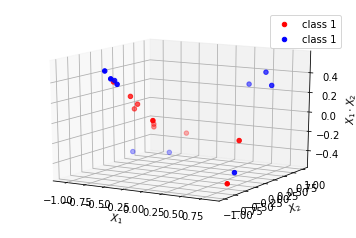

In [9]:
for angle in range(0, 360,60):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_poly_train[:N_train/2,0],X_poly_train[:N_train/2,1],X_poly_train[:N_train/2,3],color='r',label='class 1')
    ax.scatter(X_poly_train[N_train/2:,0],X_poly_train[N_train/2:,1],X_poly_train[N_train/2:,3],color='b',label='class 1')
    ax.set_xlabel(r'$X_1$')
    ax.set_ylabel(r'$X_2$')
    ax.set_zlabel(r'$X_1 \cdot X_2$')
    plt.legend()
    ax.view_init(15, angle)
    plt.show()

In [10]:
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

def classify(x,theta,b):
    a = np.sum(x*theta,axis=1)+b
    return sigmoid(a)

def binaryCrossEntropy(y,x,theta,b,model,lam=0.0):
    eps = 1e-5
    yhat = model(x,theta,b)
    l = np.mean(-(1-y)*np.log((1-yhat+eps)) - y*np.log(yhat+eps)) +\
        lam*np.sum(theta**2)
    return l

def gradient(y,x,theta,b,model,lam=0.0):
    eps=1e-5
    yhat = model(x,theta,b)
    
    temp = (yhat-y)/(yhat**4+eps)
    temp = temp[:,np.newaxis]
    
    dtheta= np.mean(temp*x,axis=0) +2*lam*theta
    db= np.mean((yhat-y)/(yhat**4+eps),axis=0)
    return dtheta,db

def gradient_descent(Theta,b,X_train,Y_train,X_test,Y_test,loss,gradient,model,
                     N_iterations=1000,print_every=100,learning_rate=1e-3,lam=0.0):
    train_loss = []
    test_loss = []
    iters = []
    thetas = []
    for i in range(N_iterations):
            dtheta,db = gradient(Y_train,X_train,Theta,b,model,lam)
            
            for j in range(len(Theta)):
                Theta[j] -= learning_rate*dtheta[j]
            b -= learning_rate*db

            if (i+1)%print_every == 0:
                e = loss(Y_train,X_train,Theta,b,model,lam)
                train_loss.append(e)

                e_test = loss(Y_test,X_test,Theta,b,model,lam)
                test_loss.append(e_test)

                iters.append(i)
                thetas.append(Theta.copy())
                print "Iteration {}: Theta={}, b={}, MSE_train = {}, MSE_test = {}".format(i,Theta,b,e,e_test)
                
    thetas = np.asarray(thetas)
    
    return Theta,b,thetas,train_loss,test_loss,iters

In [11]:
learning_rate = 1e-3
degree = 8
N_iterations = 100000
Theta = np.asarray([1.0]*degree)
b = 1.0
print_every = 10000

In [12]:
Theta,b,thetas,train_loss,test_loss,iters = gradient_descent(Theta,b,X_poly_train,Y_train,X_poly_test,Y_test,
        binaryCrossEntropy,gradient,classify, N_iterations=N_iterations,print_every=print_every,learning_rate=learning_rate)

Iteration 9999: Theta=[-1.30054469  0.24326403  6.9047876   0.8411156   3.43732428  4.46746332
 -1.95177643  2.90289452], b=-1.37704364668, MSE_train = 2.45684366166, MSE_test = 2.45838688148
Iteration 19999: Theta=[  6.77687982  -0.27768049  19.31385597   2.61218359   3.81699772
  16.49685825 -10.12565434   0.9776952 ], b=-27.1469991466, MSE_train = 0.315223220114, MSE_test = 0.968807741887
Iteration 29999: Theta=[  8.04407213  -0.21107139  22.46291102   2.98094656   4.23355683
  19.2293542  -12.35073564   1.13489214], b=-31.0736098704, MSE_train = 0.299167501587, MSE_test = 1.03188421556
Iteration 39999: Theta=[  8.71569788  -0.16078443  24.08875543   3.18508334   4.45114835
  20.63760708 -13.56928798   1.24819324], b=-33.0899795916, MSE_train = 0.29427806362, MSE_test = 1.06042824968
Iteration 49999: Theta=[  9.18078248  -0.1186277   25.19193759   3.33438676   4.60096137
  21.59097621 -14.43203128   1.34050694], b=-34.4543091364, MSE_train = 0.29193671838, MSE_test = 1.07802443592
I

In [13]:
def decision_boundary(theta,b,model,gen_features,threshold=0.5,tol=0.05):
    x = np.arange(-1.5,1.5,0.005)
    boundary = []
    for x1 in x:
        for x2 in x:
            point = np.asarray([[x1,x2]])
            features = gen_features(point)
            output = model(features,theta,b)
            if (np.abs(output-threshold)<=tol):
                boundary.append(point[0])
                
    return np.asarray(boundary)

In [14]:
boundary = decision_boundary(Theta,b,classify,create_poly_features)
print boundary.shape

(1218, 2)


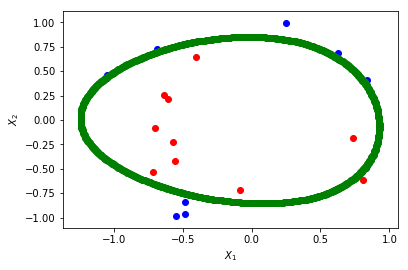

In [15]:
plt.figure()
plt.scatter(X_train[:N_train/2,0],X_train[:N_train/2,1],color='r',label='class 1')
plt.scatter(X_train[N_train/2:,0],X_train[N_train/2:,1],color='b',label='class 2')
plt.scatter(boundary[:,0],boundary[:,1],color='g')
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.show()

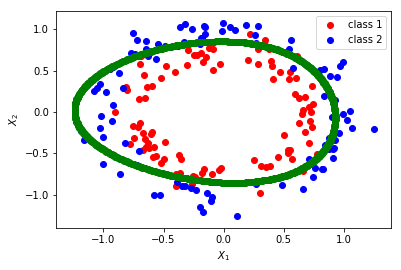

In [16]:
plt.figure()
plt.scatter(X_test[:N_test/2,0],X_test[:N_test/2,1],color='r',label='class 1')
plt.scatter(X_test[N_test/2:,0],X_test[N_test/2:,1],color='b',label='class 2')
plt.scatter(boundary[:,0],boundary[:,1],color='g')
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.legend()
plt.show()

In [24]:
learning_rate = 1e-4
degree = 3
N_iterations = 10000
Theta = np.asarray([1.0]*degree)
b = 1.0
print_every = 1000
lam = 0.0
def create_poly_features(x):
    f1 = x[:,0]**2+x[:,1]**2

    x = np.vstack([x[:,0], x[:,1], f1])
    return x.T

X_poly_train = create_poly_features(X_train)
X_poly_test = create_poly_features(X_test)

Theta,b,thetas,train_loss,test_loss,iters = gradient_descent(Theta,b,X_poly_train,Y_train,X_poly_test,Y_test,
        binaryCrossEntropy,gradient,classify, N_iterations=N_iterations,print_every=print_every,learning_rate=learning_rate,lam=lam)

Iteration 999: Theta=[ 1.03738552  0.99811957  0.96851842], b=0.900200786408, MSE_train = 0.802241180842, MSE_test = 0.90918841996
Iteration 1999: Theta=[ 1.07709837  0.98863305  0.94330188], b=0.796160139433, MSE_train = 0.773658621905, MSE_test = 0.876588226999
Iteration 2999: Theta=[ 1.11930239  0.96853539  0.92719347], b=0.687948282209, MSE_train = 0.747972728927, MSE_test = 0.846374091952
Iteration 3999: Theta=[ 1.16484025  0.93503549  0.92252125], b=0.574538252938, MSE_train = 0.724910273251, MSE_test = 0.81842387996
Iteration 4999: Theta=[ 1.2160379   0.88610726  0.93023338], b=0.452342691405, MSE_train = 0.703747471675, MSE_test = 0.792044577228
Iteration 5999: Theta=[ 1.27773832  0.81988142  0.95014554], b=0.313424357031, MSE_train = 0.683670627235, MSE_test = 0.766176325947
Iteration 6999: Theta=[ 1.3596348   0.73205062  0.9829135 ], b=0.141563692666, MSE_train = 0.664393935535, MSE_test = 0.739811811146
Iteration 7999: Theta=[ 1.48585229  0.60881807  1.03568483], b=-0.104622

(5845, 2)


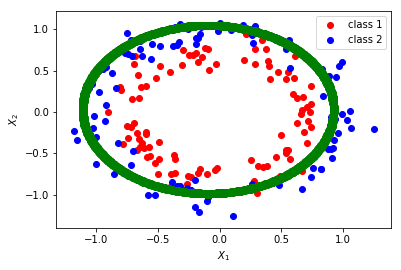

In [25]:
boundary = decision_boundary(Theta,b,classify,create_poly_features)
print boundary.shape

plt.figure()
plt.scatter(X_test[:N_test/2,0],X_test[:N_test/2,1],color='r',label='class 1')
plt.scatter(X_test[N_test/2:,0],X_test[N_test/2:,1],color='b',label='class 2')
plt.scatter(boundary[:,0],boundary[:,1],color='g')
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.legend()
plt.show()

(17616, 2)


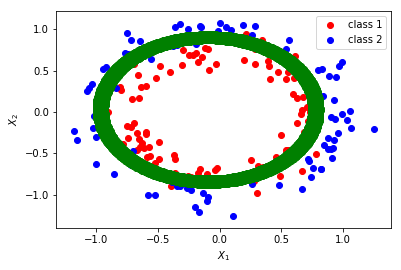

In [28]:
boundary = decision_boundary(Theta,b,classify,create_poly_features,threshold=0.1)
print boundary.shape

plt.figure()
plt.scatter(X_test[:N_test/2,0],X_test[:N_test/2,1],color='r',label='class 1')
plt.scatter(X_test[N_test/2:,0],X_test[N_test/2:,1],color='b',label='class 2')
plt.scatter(boundary[:,0],boundary[:,1],color='g')
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.legend()
plt.show()